In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy.signal import convolve2d, convolve

1D Derivative Masks

In [2]:
f = np.array([10, 15, 10, 10, 25, 20, 20, 20])
fwd_mask = np.array([1, -1])
bwd_mask = np.array([-1, 1])
central_mask = np.array([-1, 0, 1])

fwd = convolve(f, fwd_mask, mode='valid')
bwd = convolve(f, bwd_mask, mode='valid')
central = convolve(f, central_mask, mode='valid')

print("bwd: ", bwd)
print("fwd: ", fwd)
print("central: ", central)

bwd:  [ -5   5   0 -15   5   0   0]
fwd:  [ 5 -5  0 15 -5  0  0]
central:  [  0   5 -15 -10   5   0]


2D Derivative Masks

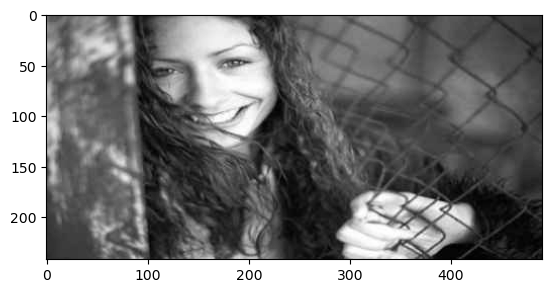

In [3]:
img = cv2.imread("girl.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

In [4]:
# Define filters
f_x = np.array([[-1, 1]])
f_y = np.array([[-1], [1]])

# Convolve image with filters
out_x = convolve2d(img, f_x, mode='same')
out_y = convolve2d(img, f_y, mode='same')

# Print results
print("Convolved with f_x:\n", out_x)
print("Convolved with f_y:\n", out_y)

Convolved with f_x:
 [[-130    6   12 ...    5    0    0]
 [-128    7   11 ...    5    0    0]
 [-125    7   11 ...    5    0    0]
 ...
 [ -39   -1   -2 ...    5    1    3]
 [ -46    0   -1 ...   -1    7    7]
 [ -46    0   -1 ...   -1    7    7]]
Convolved with f_y:
 [[-130 -124 -112 ...  -53  -53  -53]
 [   2    3    2 ...    0    0    0]
 [   3    3    3 ...    0    0    0]
 ...
 [   1    1    1 ...   -3   -4   -3]
 [  -7   -6   -5 ...   -8   -2    2]
 [   0    0    0 ...    0    0    0]]


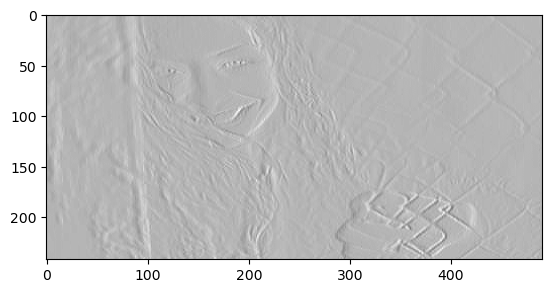

In [5]:
plt.imshow(out_x, cmap="gray")

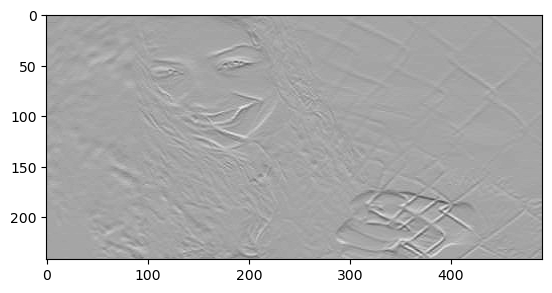

In [6]:
plt.imshow(out_y, cmap="gray")

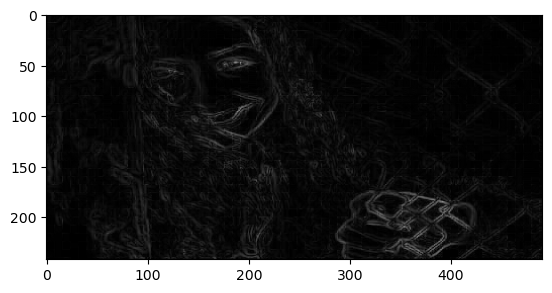

In [7]:
mag_out = np.sqrt(out_x**2 + out_y**2)
plt.imshow(mag_out, cmap="gray")

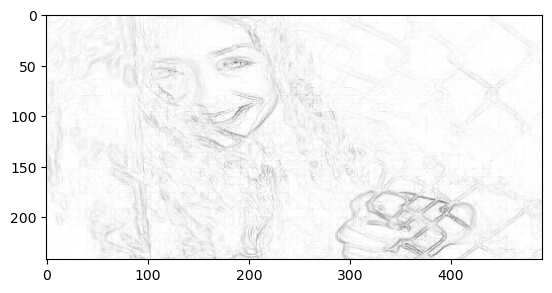

In [8]:
# Invert the image
mag_out_inv = 255 - mag_out
plt.imshow(mag_out_inv, cmap="gray")

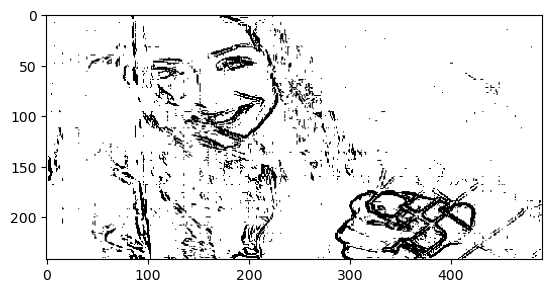

In [9]:
# Apply threshold
thresh = 235
mag_binary = np.ones_like(mag_out_inv)
mag_binary[mag_out_inv < thresh] = 0
plt.imshow(mag_binary, cmap="gray")

Convolved with f_x:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Convolved with f_y:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


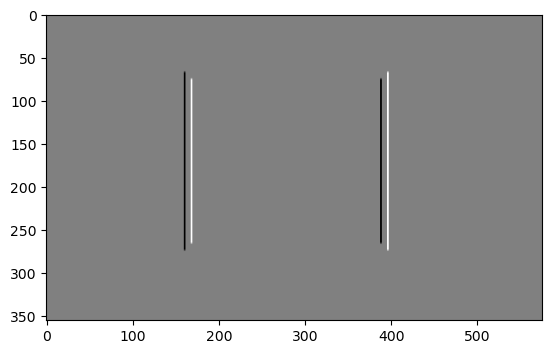

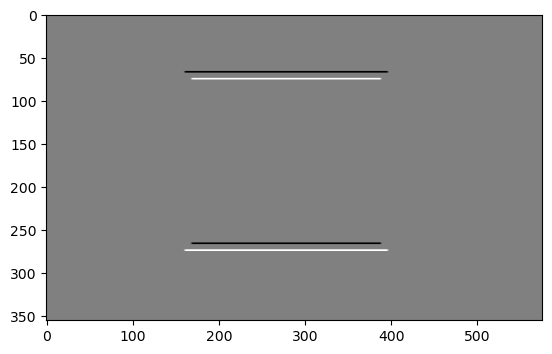

In [12]:
img = cv2.imread("square.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Prewitt for horizontal edges and vertical edges
f_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
f_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Convolve image with filters
out_x = convolve2d(img, f_x, mode='same')
out_y = convolve2d(img, f_y, mode='same')

# Print results
print("Convolved with f_x:\n", out_x)
print("Convolved with f_y:\n", out_y)

plt.imshow(out_x, cmap="gray")
plt.show()

plt.imshow(out_y, cmap="gray")
plt.show()